In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from collections import Counter
from scipy.stats import rankdata

In [2]:
#read file and make lists
file = '2023.csv'
data = pd.read_csv(file)

dates = data['Date'].tolist()
artists = data['Artist '].tolist()
genres = data['Genre'].tolist()
years = data['Year'].tolist()
labels = data['Label'].tolist()

### Artists


In [3]:
new_artists=[]
#separate collabs
for artist in artists:
    #print(artist)
    if ',' in artist:
        split_items= artist.split(',')
        new_artists.extend(split_items)
    else:
        new_artists.append(artist)
new_artists = [s.strip() for s in new_artists]
#count unique artists
unique_artists = []
for item in new_artists:
    if item not in unique_artists:
        unique_artists.append(item)

number_of_unique_items = len(unique_artists)
print('Number of Artists: ',number_of_unique_items)

#most popular artists
print('\n','~~~ Most popular artists ~~~')
artist_counts = Counter(new_artists)
top_common_artists = artist_counts.most_common(14)
for item, count in top_common_artists:
    print(f"{item}: {count}")
print('...')

Number of Artists:  405

 ~~~ Most popular artists ~~~
Various Artists: 9
Chris & Cosey: 4
Coil: 4
Buttechno: 3
Sun Ra: 3
Throbbing Gristle: 3
Autechre: 3
Aho Ssan: 3
Billy Woods: 3
Kenny Segal: 3
Yusef Lateef: 3
Babyfather: 3
Toro y Moi: 3
Arthur Russell: 3
...


### Label

In [4]:
#count unique labels
labels = [s.rstrip() for s in labels]#removes spaces at the end of strings
unique_labels = []
for item in labels:
    if item not in unique_labels:
        unique_labels.append(item)

number_of_unique_items = len(unique_labels)
print('Number of Labels: ',number_of_unique_items)

#most popular labels
print('\n','~~~ Most popular labels ~~~')
label_counts = Counter(labels)
top_common_label = label_counts.most_common(15)
for item, count in top_common_label:
    print(f"{item}: {count}")

print('...')

Number of Labels:  290

 ~~~ Most popular labels ~~~
[self]: 41
WARP: 15
XL Recordings: 7
Posh Isolation: 7
PAN: 7
Mute Artists: 6
Hyperdub: 6
!K7: 6
Fabric Records: 6
Ninja Tune: 5
Kranky: 4
Backwoodz Studioz: 4
Atlantic: 4
WORLD MUSIC: 4
Dead Oceans: 4
...


### Year

In [5]:
decades=[]
for year in years:
   if year ==2023:
      decades.append(year)
   else:
      decade = int(str(year)[:-1] + '0')
      decades.append(decade)
decade_counts = Counter(decades)
sorted_decades = sorted(decade_counts.keys())

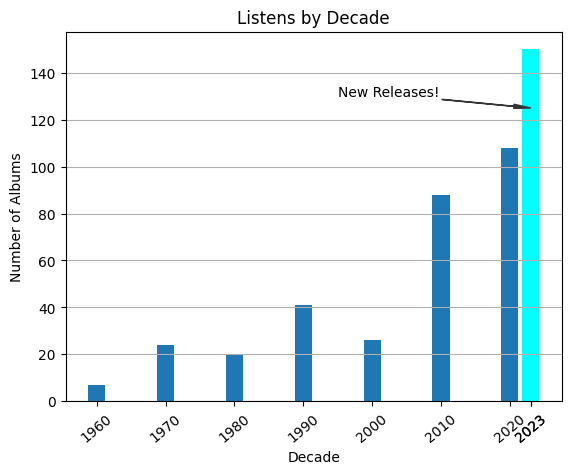

In [6]:
fig2,ax2 = plt.subplots(1,1)
ax2.grid(axis='y')
ax2.bar(sorted_decades, [decade_counts[decade] for decade in sorted_decades], width=2.5,align='center')
ax2.patches[-1].set_facecolor('cyan')#change 2022 color
ax2.set_xticks(list(sorted_decades) + [2023])
ax2.xaxis.set_tick_params(rotation=40)
ax2.set_xlabel('Decade')
ax2.set_ylabel('Number of Albums')
ax2.set_title('Listens by Decade')
ax2.annotate('New Releases!', xy=(2023, 125), xytext=(1995, 130), fontsize=10, arrowprops={'width':0.2,'headwidth':3,'color':'#333333'})
plt.show()

### Months


In [7]:
months = [int(date.split('/')[1]) for date in dates]
month_counts = Counter(months)
sorted_months = sorted(month_counts.keys())
ints, month_vals = zip(*[(int(month), count) for month, count in month_counts.items()])
month_vals = list(month_vals)
sorted_months.append(13)#append to make graph nice and not end at 12
month_vals.append(month_vals[-1])


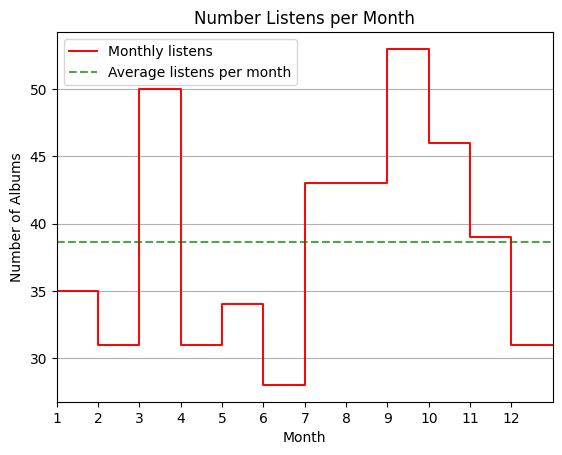

In [8]:
fig2,ax2 = plt.subplots(1,1)
ax2.grid(axis='y')
ax2.step(sorted_months,month_vals,linewidth=1.4,label='Monthly listens',where='post',color='r')
ax2.hlines(len(dates)/12.,1,13,alpha=0.7,linestyles='dashed',label='Average listens per month',color='g')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Albums')
ax2.set_title('Number Listens per Month')
ax2.set_xticks(sorted_months[:-1])
ax2.set_xlim(1,13)
ax2.legend()
plt.show()

### Genres

In [9]:
genres = [s.rstrip() for s in genres]
genre_counts=Counter(genres)
print(list(genre_counts.values()))

[25, 174, 37, 33, 59, 70, 38, 8, 20]


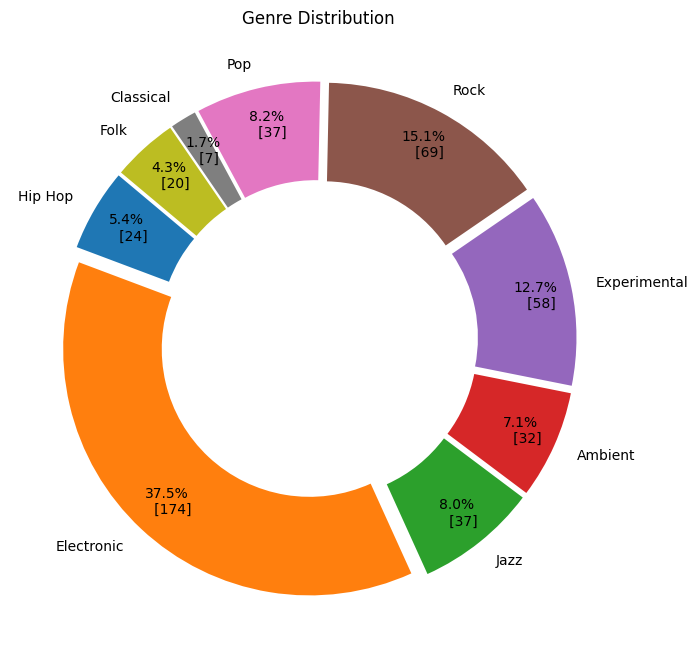

In [10]:
#Pie chart of genres
def func(pct, allvalues):#for displaying percentages and counts
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n   [{:d}]".format(pct, absolute)

explode = [0.05] * len(genre_counts)
fig, ax = plt.subplots(figsize=(8, 8))
outer = plt.pie(genre_counts.values(), labels=genre_counts.keys(),  autopct=lambda pct: func(pct, list(genre_counts.values())), startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.4),explode=explode)
inner = plt.pie([1], radius=0.6, colors='white', wedgeprops=dict(width=0.4))
plt.title('Genre Distribution')
plt.show()

In [11]:
# Get unique genres
unique_genres = set(genres)

#nested dictionary with zero counts for all genres
month_genre_counts = {month: Counter({genre: 0 for genre in unique_genres}) for month in set(months)}
month_genre_pairs = list(zip(months, genres))#pair months and genres
# Update counts for each genre within each month
for month, genre in month_genre_pairs:
    month_genre_counts[month][genre] += 1
genres_list, counts_list = zip(*[(genre, [counts[genre] for counts in month_genre_counts.values()]) for genre in unique_genres])

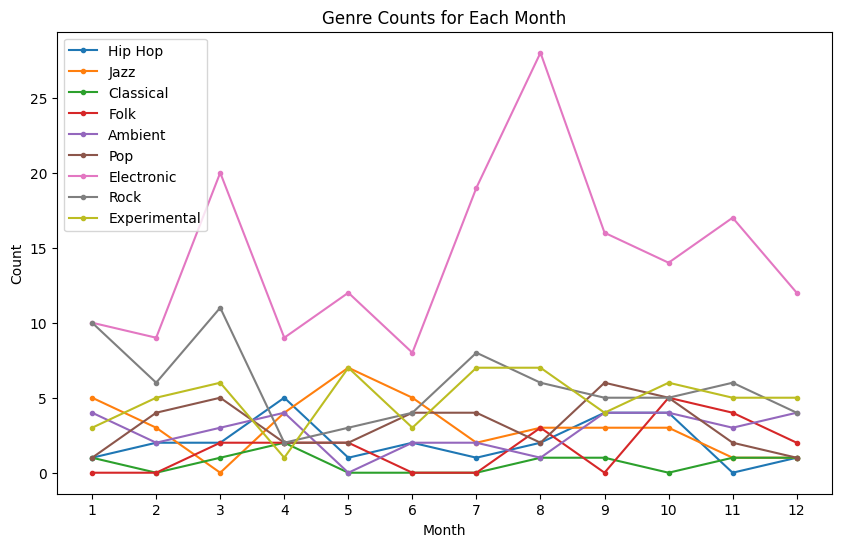

In [12]:
plt.figure(figsize=(10, 6))
for genre, counts in zip(genres_list, counts_list):
    plt.plot(sorted(set(months)), counts,marker='.', label=f"{genre}")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Genre Counts for Each Month')
plt.xticks(sorted_months[:-1])
plt.legend()
plt.show()

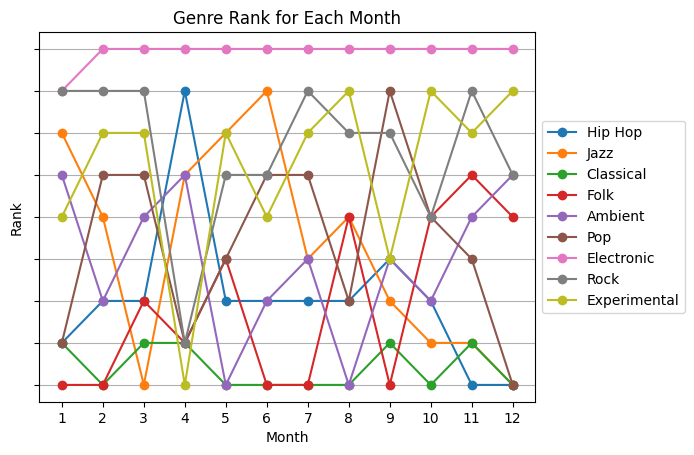

In [13]:
dummy_array = np.zeros_like(np.array(counts_list))

for j in range(0,12):
    temp=np.zeros(len(genres_list))
    for i in range(len(counts_list)):
        temp[i]=counts_list[i][j]
    rank = rankdata(temp,method='min')
    for i in range(len(rank)):
        dummy_array[i][j]= rank[i]

fig3,ax3 = plt.subplots(1,1)
for genre, counts in zip(genres_list, dummy_array):
    ax3.plot(sorted(set(months)), counts,marker='o', label=f"{genre}")

ax3.grid(axis='y')
ax3.set_xlabel('Month')
ax3.set_ylabel('Rank')
ax3.set_title('Genre Rank for Each Month')
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax3.set_xticks(range(1,13) )
ax3.set_yticklabels([])
plt.show()

In [14]:
#run through genres and get count for each decade in each genre
dec_counts_all_g =[]
for genre in genres_list:
    indices = [index for index, value in enumerate(genres) if value == genre]
    temp_decades = []
    for i in indices:
        temp_decades.append(decades[i])
    g_decade_counts = Counter(temp_decades)
    g_sorted_decades = sorted(decade_counts.keys())
    dec_counts_all_g.append([g_decade_counts[decade] for decade in g_sorted_decades])


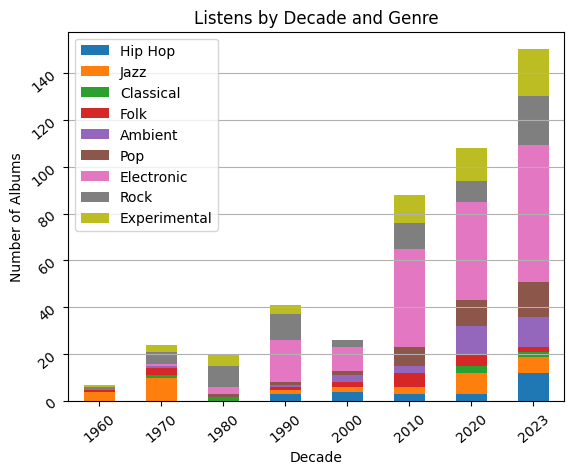

In [15]:
#make panda dataframe and plot
df = pd.DataFrame(dec_counts_all_g,index=genres_list,columns=sorted_decades)
dft = df.T
dft.plot(kind='bar',stacked=True)
plt.grid(axis='y')
plt.tick_params(rotation=40)
plt.xlabel('Decade')
plt.ylabel('Number of Albums')
plt.title('Listens by Decade and Genre')
plt.show()